Aktien und Politik

Energie spielt eine zentrale Rolle für das Funktionieren einer hochentwickelten Wirtschaftsnation wie Deutschland. Im Kern dieses Energiesystems stehen die großen Energiekonzerne. Diese Analyse zielt darauf ab, den Einfluss politischer Entscheidungen, wie beispielsweise des Atomausstiegs auf die Aktienkursentwicklung dieser Unternehmen zu untersuchen.

Atomaustieg

Ein starkes Unterwasserbeben mit einer Stärke von 9 auf der Richterskala im März 2011 verursachte einen verheerenden Tsunami, der den Nordosten Japans heimsuchte. Die Flutwelle traf auch das Kernkraftwerk Fukushima Daiichi.

Kurz nach dem Vorfall in Fukushima entschied die von Bundeskanzlerin Angela Merkel geführte deutsche Bundesregierung, aus der Kernenergie auszusteigen. Diese Entscheidung wurde als bedeutende Kehrtwende betrachtet, insbesondere da erst ein Jahr zuvor beschlossen wurde, die Betriebszeiten der deutschen Kernkraftwerke zu verlängern.

Das "Dreizehnte Gesetz zur Änderung des Atomgesetzes", welches den beschleunigten Atomausstieg infolge der Fukushima-Krise verankerte, trat am 6. August 2011 in Kraft. 

Das Ziel dieser empirischen Untersuchung ist die Analyse der Aktienkursreaktionen deutscher Energiekonzerne infolge des Atomausstiegs. Da frühere politische Entscheidungen im Bereich der nationalen Energiepolitik bereits spürbare Effekte auf die Aktienkurse der Energieunternehmen hatten, liegt die Annahme nahe, dass der politische Umschwung hin zum Atomausstieg ebenfalls Einfluss auf die Börsenkurse dieser Unternehmen nehmen wird.

Die drei führende deutsche Energieunternehmen  1) RWE, 2) EnBW  und 3) E.ON werden dazu in Betracht gezogen und DAX Aktienkurs, der als Benchmark (Referenzvariable) dient. 

Um ein übersicht der Bewegung der Aktienkurse werden zuerst die Aktienkurse der alle vier Konzerne von der Yahoo-Finance Webseite in der Zeit ab 2010-08-06 bis 2012-08-06 heruntergeladen, ein Jahr vor und nach dem Ereignis am 2011-08-06 als das Gesetzt gebracht wurde.

In [139]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [140]:
# RWE
df_rwe = pd.read_csv("RWE.DE.csv", index_col="Date")


In [141]:
# EON
df_eoan = pd.read_csv("EOAN.DE.csv", index_col="Date")

In [142]:
# EBK
df_ebk = pd.read_csv("EBK.DE.csv", index_col="Date")

In [143]:
# DAX
df_dax = pd.read_csv("^GDAXI.csv", index_col="Date")

In [144]:
# Die Variablennahmen ändern wegen der Leerzeichen:

df_rwe = df_rwe.rename(columns={"Adj Close": "Adjusted"})
df_eoan = df_eoan.rename(columns={"Adj Close": "Adjusted"})
df_ebk = df_ebk.rename(columns={"Adj Close": "Adjusted"})
df_dax = df_dax.rename(columns={"Adj Close": "Adjusted"})

In [145]:
print(df_rwe.head())
print(df_eoan.head())
print(df_ebk.head())
print(df_dax.head())

                 Open       High        Low      Close   Adjusted   Volume
Date                                                                      
2010-08-06  55.714470  55.734406  54.757656  55.076595  32.402344  1982542
2010-08-09  55.764305  55.933739  55.564968  55.804173  32.830383  1407316
2010-08-10  55.275932  55.634735  54.827423  55.315800  32.543068  1875649
2010-08-11  54.827423  55.056660  53.820778  54.010147  31.774933  2653914
2010-08-12  54.069946  54.179581  53.192867  53.452003  31.446573  2716636
                 Open       High        Low      Close   Adjusted    Volume
Date                                                                       
2010-08-06  21.343451  21.388765  20.813263  20.899361  10.318970  10614621
2010-08-09  21.125937  21.270945  21.080622  21.171251  10.453214   8442293
2010-08-10  21.225630  21.465801  21.107811  21.248287  10.491251   7414517
2010-08-11  21.107811  21.284540  20.908424  20.944675  10.341340   8707899
2010-08-12  20.9129

In [146]:

import matplotlib.pyplot as plt

In [147]:
# Umbenennen der Spalten, um Kollisionen beim 
# Zusammenführen zu vermeiden und die Herkunft der Daten zu kennzeichnen
df_rwe = df_rwe.add_prefix('RWE.')
df_eoan = df_eoan.add_prefix('EOAN.')
df_ebk = df_ebk.add_prefix('EBK.')
df_dax = df_dax.add_prefix('DAX.')



In [148]:
# Zusammenführen der DataFrames anhand des Datums
combined_data = df_rwe.join([df_eoan, df_ebk, df_dax], how='outer')

print(combined_data.head())


             RWE.Open   RWE.High    RWE.Low  RWE.Close  RWE.Adjusted  \
Date                                                                   
2010-08-06  55.714470  55.734406  54.757656  55.076595     32.402344   
2010-08-09  55.764305  55.933739  55.564968  55.804173     32.830383   
2010-08-10  55.275932  55.634735  54.827423  55.315800     32.543068   
2010-08-11  54.827423  55.056660  53.820778  54.010147     31.774933   
2010-08-12  54.069946  54.179581  53.192867  53.452003     31.446573   

            RWE.Volume  EOAN.Open  EOAN.High   EOAN.Low  EOAN.Close  ...  \
Date                                                                 ...   
2010-08-06     1982542  21.343451  21.388765  20.813263   20.899361  ...   
2010-08-09     1407316  21.125937  21.270945  21.080622   21.171251  ...   
2010-08-10     1875649  21.225630  21.465801  21.107811   21.248287  ...   
2010-08-11     2653914  21.107811  21.284540  20.908424   20.944675  ...   
2010-08-12     2716636  20.912954  21.0

In [149]:
# Es wird nach Na-s geprüft:
na_columns = combined_data.columns[combined_data.isna().any()].tolist()
if na_columns:
    print(f"Die folgenden Spalten haben NA-Werte: {', '.join(na_columns)}")
else:
    print("Es gibt keine NA-Werte im Datensatz.")


Es gibt keine NA-Werte im Datensatz.


In [150]:
combined_data.head()

,RWE.Open,RWE.High,RWE.Low,RWE.Close,RWE.Adjusted,RWE.Volume,EOAN.Open,EOAN.High,EOAN.Low,EOAN.Close,...,EBK.Low,EBK.Close,EBK.Adjusted,EBK.Volume,DAX.Open,DAX.High,DAX.Low,DAX.Close,DAX.Adjusted,DAX.Volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-06,55.714470,55.734406,54.757656,55.076595,32.402344,1982542,21.343451,21.388765,20.813263,20.899361,...,36.743530,36.743530,28.406475,1155,6361.089844,6386.970215,6244.689941,6259.629883,6259.629883,111202900
2010-08-09,55.764305,55.933739,55.564968,55.804173,32.830383,1407316,21.125937,21.270945,21.080622,21.171251,...,36.842834,37.071243,28.659838,746,6326.620117,6356.410156,6318.120117,6351.600098,6351.600098,70334800
2010-08-10,55.275932,55.634735,54.827423,55.315800,32.543068,1875649,21.225630,21.465801,21.107811,21.248287,...,37.230133,37.230133,28.782669,14,6315.870117,6333.250000,6247.620117,6286.250000,6286.250000,83815500
2010-08-11,54.827423,55.056660,53.820778,54.010147,31.774933,2653914,21.107811,21.284540,20.908424,20.944675,...,37.225166,37.225166,28.778835,27,6234.600098,6236.569824,6143.580078,6154.069824,6154.069824,107362000
2010-08-12,54.069946,54.179581,53.192867,53.452003,31.446573,2716636,20.912954,21.098747,20.872171,20.894829,...,36.544914,36.544914,28.252928,498,6141.899902,6173.419922,6097.720215,6135.169922,6135.169922,113104100


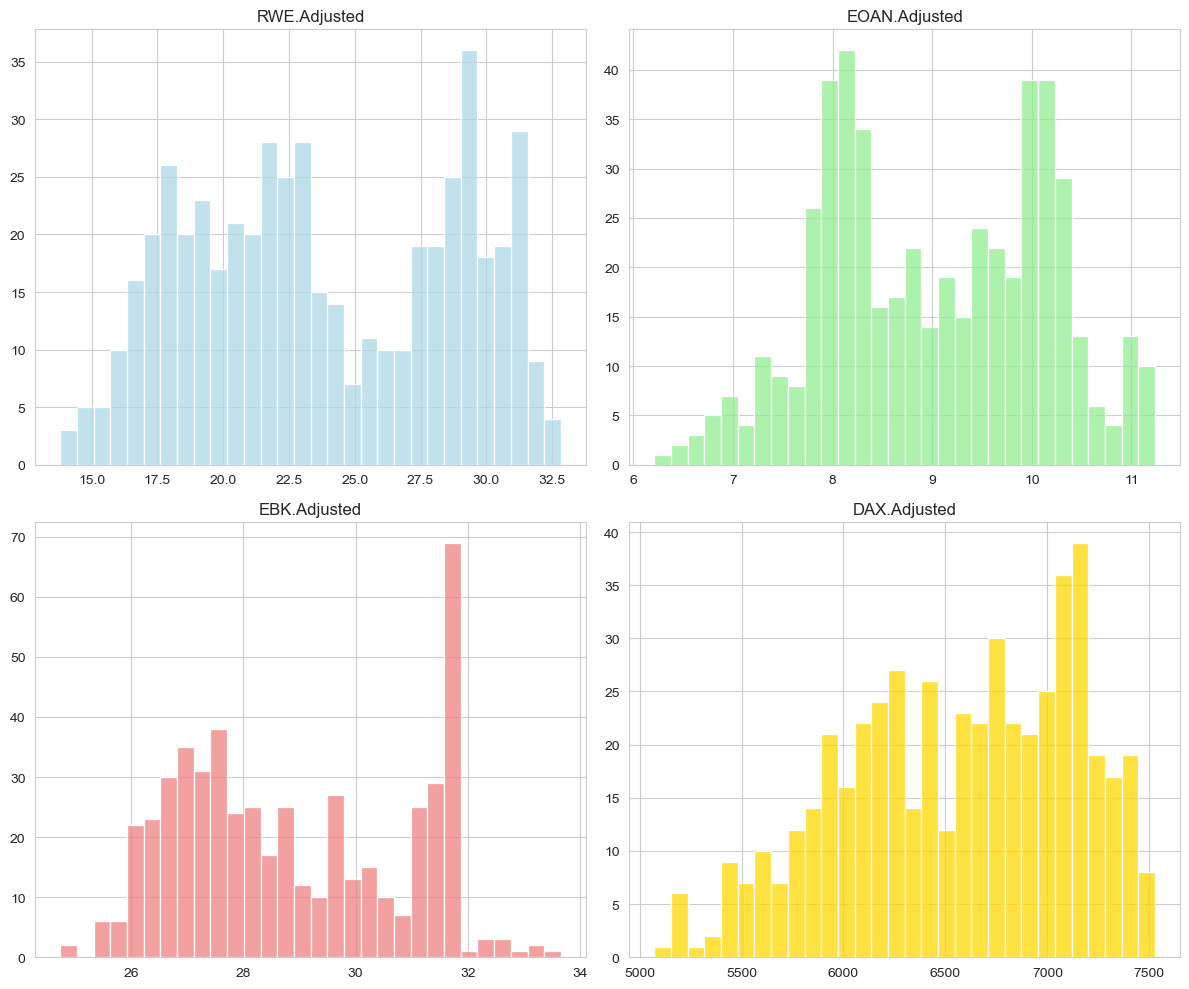

In [151]:
import seaborn as sns
# Stil und Farbschema setzen
sns.set_style("whitegrid")
colors = ["lightblue", "lightgreen", "lightcoral", "gold"]  # 'gold' anstelle von 'lightgoldenrod'

# Eine Liste der Variablen, für die Histogramme erstellt werden sollen
variables = ["RWE.Adjusted", "EOAN.Adjusted", "EBK.Adjusted", "DAX.Adjusted"]

# Erstelle einzelne Histogramme für jede Variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for ax, var, color in zip(axes.flatten(), variables, colors):
    sns.histplot(combined_data[var], ax=ax, bins=30, kde=False, color=color)
    ax.set_title(var)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


In [152]:
combined_data.head()

,RWE.Open,RWE.High,RWE.Low,RWE.Close,RWE.Adjusted,RWE.Volume,EOAN.Open,EOAN.High,EOAN.Low,EOAN.Close,...,EBK.Low,EBK.Close,EBK.Adjusted,EBK.Volume,DAX.Open,DAX.High,DAX.Low,DAX.Close,DAX.Adjusted,DAX.Volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-06,55.714470,55.734406,54.757656,55.076595,32.402344,1982542,21.343451,21.388765,20.813263,20.899361,...,36.743530,36.743530,28.406475,1155,6361.089844,6386.970215,6244.689941,6259.629883,6259.629883,111202900
2010-08-09,55.764305,55.933739,55.564968,55.804173,32.830383,1407316,21.125937,21.270945,21.080622,21.171251,...,36.842834,37.071243,28.659838,746,6326.620117,6356.410156,6318.120117,6351.600098,6351.600098,70334800
2010-08-10,55.275932,55.634735,54.827423,55.315800,32.543068,1875649,21.225630,21.465801,21.107811,21.248287,...,37.230133,37.230133,28.782669,14,6315.870117,6333.250000,6247.620117,6286.250000,6286.250000,83815500
2010-08-11,54.827423,55.056660,53.820778,54.010147,31.774933,2653914,21.107811,21.284540,20.908424,20.944675,...,37.225166,37.225166,28.778835,27,6234.600098,6236.569824,6143.580078,6154.069824,6154.069824,107362000
2010-08-12,54.069946,54.179581,53.192867,53.452003,31.446573,2716636,20.912954,21.098747,20.872171,20.894829,...,36.544914,36.544914,28.252928,498,6141.899902,6173.419922,6097.720215,6135.169922,6135.169922,113104100


In [153]:
# Index als Datum formatieren
combined_data.index = pd.to_datetime(combined_data.index)
combined_data.head()

,RWE.Open,RWE.High,RWE.Low,RWE.Close,RWE.Adjusted,RWE.Volume,EOAN.Open,EOAN.High,EOAN.Low,EOAN.Close,...,EBK.Low,EBK.Close,EBK.Adjusted,EBK.Volume,DAX.Open,DAX.High,DAX.Low,DAX.Close,DAX.Adjusted,DAX.Volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-06,55.714470,55.734406,54.757656,55.076595,32.402344,1982542,21.343451,21.388765,20.813263,20.899361,...,36.743530,36.743530,28.406475,1155,6361.089844,6386.970215,6244.689941,6259.629883,6259.629883,111202900
2010-08-09,55.764305,55.933739,55.564968,55.804173,32.830383,1407316,21.125937,21.270945,21.080622,21.171251,...,36.842834,37.071243,28.659838,746,6326.620117,6356.410156,6318.120117,6351.600098,6351.600098,70334800
2010-08-10,55.275932,55.634735,54.827423,55.315800,32.543068,1875649,21.225630,21.465801,21.107811,21.248287,...,37.230133,37.230133,28.782669,14,6315.870117,6333.250000,6247.620117,6286.250000,6286.250000,83815500
2010-08-11,54.827423,55.056660,53.820778,54.010147,31.774933,2653914,21.107811,21.284540,20.908424,20.944675,...,37.225166,37.225166,28.778835,27,6234.600098,6236.569824,6143.580078,6154.069824,6154.069824,107362000
2010-08-12,54.069946,54.179581,53.192867,53.452003,31.446573,2716636,20.912954,21.098747,20.872171,20.894829,...,36.544914,36.544914,28.252928,498,6141.899902,6173.419922,6097.720215,6135.169922,6135.169922,113104100


In [154]:
# Index in ein Datumsformat umwandeln
#combined_data.index = pd.to_datetime(combined_data.index)

# Index als eine neue Spalte 'Date' hinzufügen
#combined_data['Date'] = combined_data.index


In [155]:
combined_data.head()

,RWE.Open,RWE.High,RWE.Low,RWE.Close,RWE.Adjusted,RWE.Volume,EOAN.Open,EOAN.High,EOAN.Low,EOAN.Close,...,EBK.Low,EBK.Close,EBK.Adjusted,EBK.Volume,DAX.Open,DAX.High,DAX.Low,DAX.Close,DAX.Adjusted,DAX.Volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-06,55.714470,55.734406,54.757656,55.076595,32.402344,1982542,21.343451,21.388765,20.813263,20.899361,...,36.743530,36.743530,28.406475,1155,6361.089844,6386.970215,6244.689941,6259.629883,6259.629883,111202900
2010-08-09,55.764305,55.933739,55.564968,55.804173,32.830383,1407316,21.125937,21.270945,21.080622,21.171251,...,36.842834,37.071243,28.659838,746,6326.620117,6356.410156,6318.120117,6351.600098,6351.600098,70334800
2010-08-10,55.275932,55.634735,54.827423,55.315800,32.543068,1875649,21.225630,21.465801,21.107811,21.248287,...,37.230133,37.230133,28.782669,14,6315.870117,6333.250000,6247.620117,6286.250000,6286.250000,83815500
2010-08-11,54.827423,55.056660,53.820778,54.010147,31.774933,2653914,21.107811,21.284540,20.908424,20.944675,...,37.225166,37.225166,28.778835,27,6234.600098,6236.569824,6143.580078,6154.069824,6154.069824,107362000
2010-08-12,54.069946,54.179581,53.192867,53.452003,31.446573,2716636,20.912954,21.098747,20.872171,20.894829,...,36.544914,36.544914,28.252928,498,6141.899902,6173.419922,6097.720215,6135.169922,6135.169922,113104100


In [156]:
print(combined_data.columns)


Index(['RWE.Open', 'RWE.High', 'RWE.Low', 'RWE.Close', 'RWE.Adjusted',
       'RWE.Volume', 'EOAN.Open', 'EOAN.High', 'EOAN.Low', 'EOAN.Close',
       'EOAN.Adjusted', 'EOAN.Volume', 'EBK.Open', 'EBK.High', 'EBK.Low',
       'EBK.Close', 'EBK.Adjusted', 'EBK.Volume', 'DAX.Open', 'DAX.High',
       'DAX.Low', 'DAX.Close', 'DAX.Adjusted', 'DAX.Volume'],
      dtype='object')


In [157]:
print(combined_data.loc['2011-11-01':'2011-11-11'])


             RWE.Open   RWE.High    RWE.Low  RWE.Close  RWE.Adjusted  \
Date                                                                   
2011-11-01  30.099768  30.109734  28.425343  28.559895     18.178129   
2011-11-02  29.063219  29.182821  27.961885  28.858898     18.368446   
2011-11-03  28.131323  30.747610  28.056570  30.563225     19.453238   
2011-11-04  30.657909  30.702759  28.664547  28.814049     18.339899   
2011-11-07  28.480162  29.875513  27.862219  29.232655     18.606339   
2011-11-08  29.232655  29.855579  28.574844  28.659563     18.241568   
2011-11-09  29.152920  29.222689  27.632982  27.966869     17.800674   
2011-11-10  27.408728  29.277506  27.259226  28.669531     18.247915   
2011-11-11  28.689465  30.338970  28.400427  30.074850     19.142387   

            RWE.Volume  EOAN.Open  EOAN.High   EOAN.Low  EOAN.Close  ...  \
Date                                                                 ...   
2011-11-01     5010823  15.497791  15.497791  14.736496

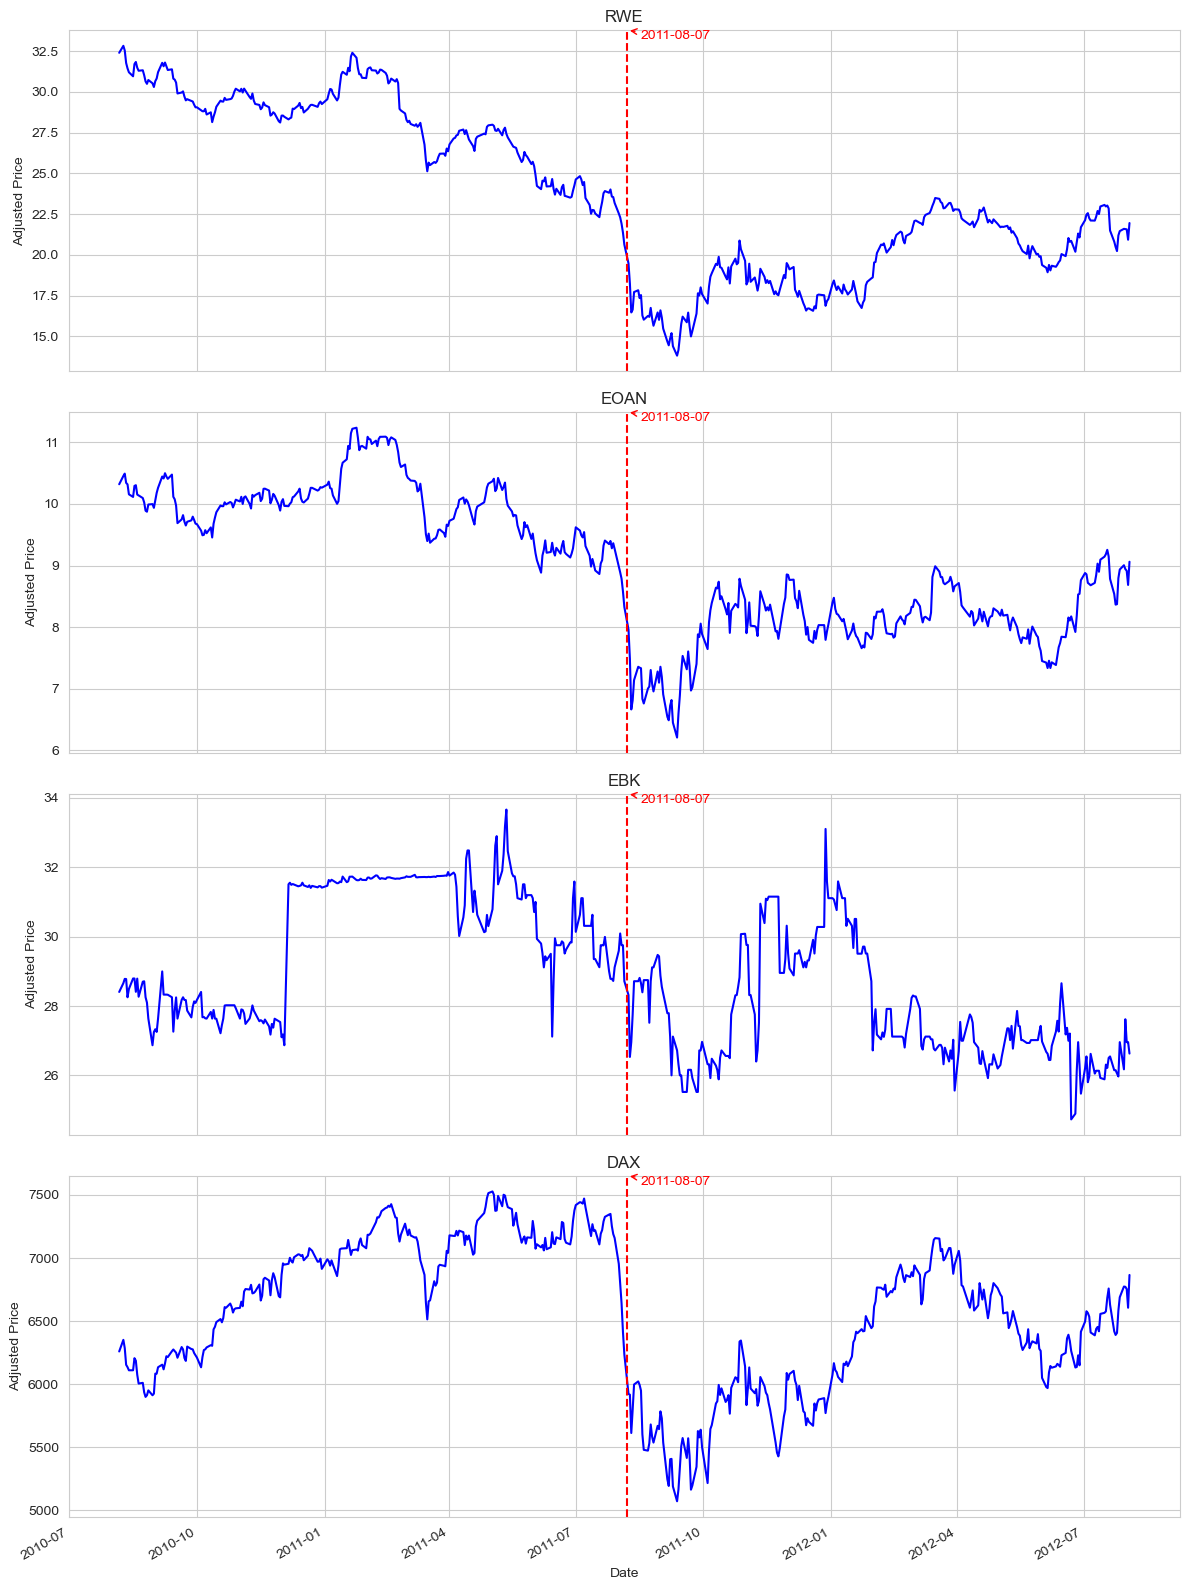

In [158]:
# Daten extrahieren
data = {
    'RWE': combined_data['RWE.Adjusted'],
    'EOAN': combined_data['EOAN.Adjusted'],
    'EBK': combined_data['EBK.Adjusted'],
    'DAX': combined_data['DAX.Adjusted']
}

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=True)

for (name, series), ax in zip(data.items(), axes):
    series.plot(ax=ax, title=name, color='blue')
    ax.set_ylabel('Adjusted Price')
    
    # Markierung auf der x-Achse für das Datum 2011-08-07 hinzufügen
    ax.axvline('2011-08-07', color='red', linestyle='--')
    
    # Text an der x-Achse hinzufügen
    ax.annotate('2011-08-07', xy=('2011-08-07', ax.get_ylim()[1]), color='red', 
                xytext=(10,0), textcoords='offset points', 
                arrowprops=dict(arrowstyle='->', color='red'), verticalalignment='top')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

Das Beta (β) einer Aktie ist ein Maß für die Volatilität oder das systematische Risiko einer Aktie im Vergleich zum Gesamtmarkt oder einem Benchmark-Index.

Ein Beta von 1 bedeutet, dass die Aktie tendenziell genauso volatil ist wie der Markt. Wenn der Markt um 1% steigt, wird erwartet, dass die Aktie ebenfalls um 1% steigt, und umgekehrt.
Ein Beta von weniger als 1 bedeutet, dass die Aktie weniger volatil ist als der Markt. Zum Beispiel, wenn eine Aktie ein Beta von 0,5 hat, wird erwartet, dass sie nur halb so volatil ist wie der Markt. Wenn der Markt um 1% steigt, wird erwartet, dass die Aktie nur um 0,5% steigt, und umgekehrt.
Ein Beta von mehr als 1 bedeutet, dass die Aktie volatiler ist als der Markt. Zum Beispiel, wenn eine Aktie ein Beta von 2 hat, wird erwartet, dass sie doppelt so volatil ist wie der Markt. Wenn der Markt um 1% steigt, wird erwartet, dass die Aktie um 2% steigt, und umgekehrt.
Das Beta wird oft in der Kapitalmarkttheorie verwendet, um das erwartete Rendite-Risiko-Verhältnis einer Investition zu bestimmen. Es ist auch ein wichtiger Bestandteil des Capital Asset Pricing Model (CAPM), das verwendet wird, um die erwartete Rendite eines Wertpapiers basierend auf seinem Beta und der erwarteten Markrendite zu schätzen.

Zunächst wird eine Datumsspalte erzeugt aus dem Index, um im nachhinein einfacher zu arbeiten sowie die Spalten umbenannt welche Punkte im Namen haben, da Punkte manchmal für Probleme sorgen können. Außerdem werden Datensäte definiert für vor dem genannten Datum und nach dem genannten Datum.

In [159]:
combined_data["Date"] = combined_data.index

In [160]:
combined_data["rwe_adjusted"] = combined_data["RWE.Adjusted"]
combined_data["eoan_adjusted"] = combined_data["EOAN.Adjusted"]
combined_data["ebk_adjusted"] = combined_data["EBK.Adjusted"]
combined_data["dax_adjusted"] = combined_data["DAX.Adjusted"]

combined_data.loc[:, 'Trading_Day'] = range(1, len(combined_data) + 1)

In [161]:
df_first = combined_data.loc[:'2011-08-07']
df_second = combined_data.loc['2011-08-07':]

Nun wird eine Funktion erstellt, welche passend zu den Daten eine Regresseion erstellt und die zugehörigen Werte im Datensatz entsprechend einfügt.

In [162]:
def erstelle_regressionsdatensatz(daten, variable, name):
    df_model_price = smf.ols(formula= '{} ~ Trading_Day'.format(variable), data=daten)
    results = df_model_price.fit()
    results.summary()
    intercept = results.params['Intercept']
    slope = results.params['Trading_Day']
    daten.loc[:, name] = intercept + (daten.loc[:, 'Trading_Day'] * slope)
    daten.head()
    return daten[["Trading_Day", variable, name]]

In [163]:
rwe1 = erstelle_regressionsdatensatz(df_first, "rwe_adjusted","price_model_rwe1")
rwe2 = erstelle_regressionsdatensatz(df_second, "rwe_adjusted","price_model_rwe2")
eoan1 = erstelle_regressionsdatensatz(df_first, "eoan_adjusted","price_model_eoan1")
eoan2 = erstelle_regressionsdatensatz(df_second, "eoan_adjusted","price_model_eoan2")
ebk1 = erstelle_regressionsdatensatz(df_first, "ebk_adjusted","price_model_ebk1")
ebk2 = erstelle_regressionsdatensatz(df_second, "ebk_adjusted","price_model_ebk2")
dax1 = erstelle_regressionsdatensatz(df_first, "dax_adjusted","price_model_dax1")
dax2 = erstelle_regressionsdatensatz(df_second, "dax_adjusted","price_model_dax2")


Es werden die Datensätze für vor dem 7.August 2011 und nach dem 7.August 2011 zusammengeführt.

In [164]:
rwe = rwe1.append(rwe2)
eoan = eoan1.append(eoan2)
ebk = ebk1.append(ebk2)
dax = dax1.append(dax2)

Es wird die Diskrete Rendite der Aktienkurse berechnet, jeweils im relation zum DAX.

In [165]:
rwe1["rendite"] = (rwe1.rwe_adjusted - rwe1.rwe_adjusted.shift())/rwe1.rwe_adjusted
rwe2["rendite"] = (rwe2.rwe_adjusted - rwe2.rwe_adjusted.shift())/rwe2.rwe_adjusted
dax1["rendite"] = (dax1.dax_adjusted - dax1.dax_adjusted.shift())/dax1.dax_adjusted
dax2["rendite"] = (dax2.dax_adjusted - dax2.dax_adjusted.shift())/dax2.dax_adjusted
eoan1["rendite"] = (eoan1.eoan_adjusted - eoan1.eoan_adjusted.shift())/eoan1.eoan_adjusted
eoan2["rendite"] = (eoan2.eoan_adjusted - eoan2.eoan_adjusted.shift())/eoan2.eoan_adjusted
ebk1["rendite"] = (ebk1.ebk_adjusted - ebk1.ebk_adjusted.shift())/ebk1.ebk_adjusted
ebk2["rendite"] = (ebk2.ebk_adjusted - ebk2.ebk_adjusted.shift())/ebk2.ebk_adjusted

Nun wird mit der Rendite der Betafaktor der Aktie berechnet.

In [166]:
betarwe1, alpha = np.polyfit(dax1['rendite'].fillna(0), rwe1['rendite'].fillna(0), 1)
betarwe2, alpha = np.polyfit(dax2['rendite'].fillna(0), rwe2['rendite'].fillna(0), 1)
betaeoan1, alpha = np.polyfit(dax1['rendite'].fillna(0), eoan1['rendite'].fillna(0).fillna(0), 1)
betaeoan2, alpha = np.polyfit(dax2['rendite'].fillna(0), eoan2['rendite'].fillna(0), 1)
betaebk1, alpha = np.polyfit(dax1['rendite'].fillna(0), ebk1['rendite'].fillna(0), 1)
betaebk2, alpha = np.polyfit(dax2['rendite'].fillna(0), ebk2['rendite'].fillna(0), 1)

Zum Schluss werden die Ergebnisse visualisiert.

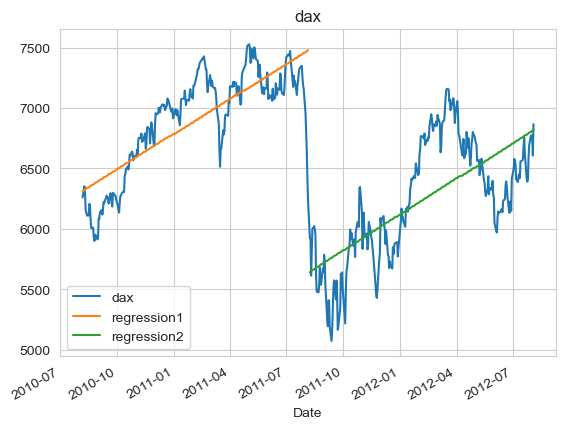

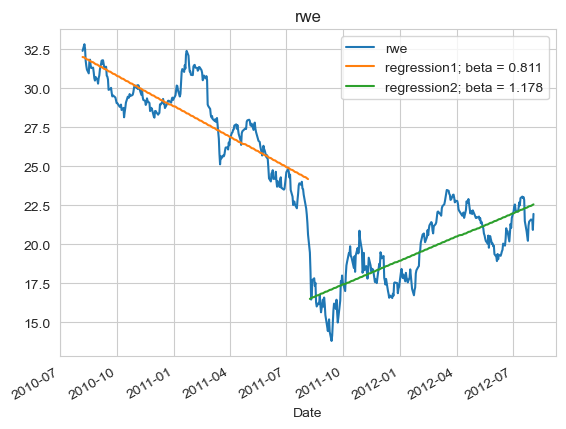

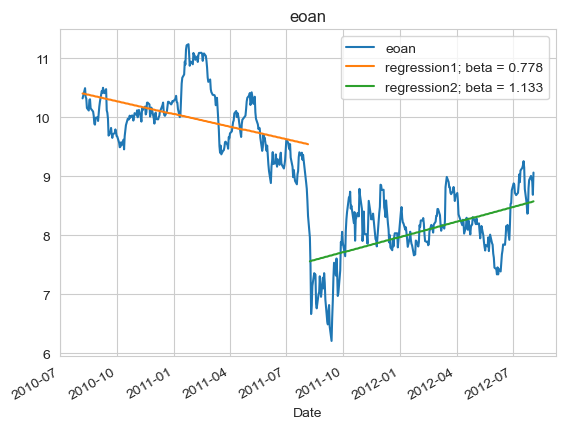

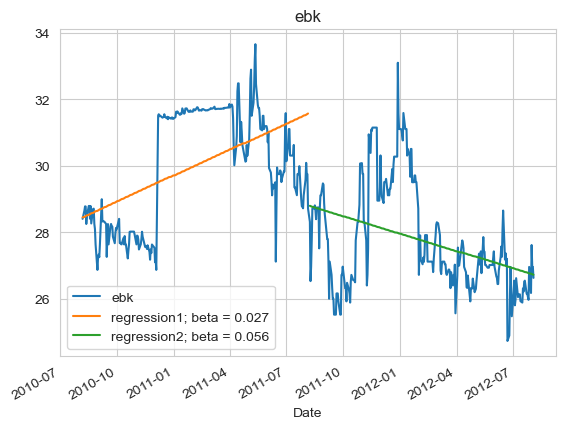

In [167]:
ax = dax.plot(y=["dax_adjusted", "price_model_dax1", "price_model_dax2"], title="dax")
ax.legend(["dax", "regression1", "regression2"])
ax = rwe.plot(y=["rwe_adjusted", "price_model_rwe1", "price_model_rwe2"], title="rwe")
ax.legend(["rwe", "regression1; beta = {}".format(round(betarwe1,3)), "regression2; beta = {}".format(round(betarwe2,3))])
ax = eoan.plot(y=["eoan_adjusted", "price_model_eoan1", "price_model_eoan2"], title="eoan")
ax.legend(["eoan", "regression1; beta = {}".format(round(betaeoan1,3)), "regression2; beta = {}".format(round(betaeoan2,3))])
ax = ebk.plot(y=["ebk_adjusted", "price_model_ebk1", "price_model_ebk2"], title="ebk")
ax.legend(["ebk", "regression1; beta = {}".format(round(betaebk1,3)), "regression2; beta = {}".format(round(betaebk2,3))])
